<a href="https://colab.research.google.com/github/geoburdin/fools_gold/blob/main/get_prediction_fools_gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the model.h5 file and the image into the colab session. Write the path to them in the two cells below 

In [1]:
from tensorflow.keras.models import load_model
model = load_model('/content/model.h5')

In [2]:
img = '/content/image.jpg'

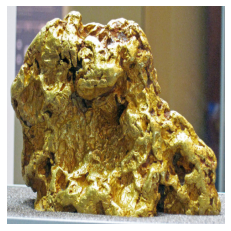

[[0.8346909  0.16780487]]
gold


In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(512, 512))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor


new_image = load_image(img, True)


pred = model.predict(new_image)
print(pred)
if pred[0][0] > 0.5:
    prediction = 'gold'
else:
    prediction = 'pyrite'
print(prediction)